In [2]:
import sys
sys.path.append('..')
from model_building import HDRPointwiseNN
from dataset import HDRDataset
import os
from PIL import Image
import math

import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader,random_split
import pytorch_lightning as pl

from pytorch_lightning.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


In [ ]:
orig_photos_path = 'E:\Projects\StyleTransfer\justinho_dataset_processed\small_original_reduced_size'
target_photos_path = 'E:\Projects\StyleTransfer\justinho_dataset_processed\small_edited_reduced_size'

In [2]:
dataset = HDRDataset(orig_photos_path,target_photos_path)
dataset_length = len(dataset)
train_length = math.ceil(.8 *dataset_length)
val_length = dataset_length-train_length
train_set, val_set = random_split(dataset, [train_length, val_length], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_set, batch_size = 4)
val_loader =  DataLoader(val_set, batch_size = 4)

NameError: name 'HDRDataset' is not defined

In [4]:
print(dataset_length)
print(train_length)
print(val_length)


413
331
82


In [5]:
hdrnet = HDRPointwiseNN()

In [13]:
trainer = pl.Trainer(gpus=1,
                     max_epochs=5,
                     val_check_interval=.5,
                     terminate_on_nan=True)
trainer.fit(hdrnet, train_dataloader = train_loader, val_dataloaders = val_loader)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type                        | Params
----------------------------------------------------------------
0 | low_level       | LowLevelFeatures            | 107 K 
1 | local_features  | LocalFeatures               | 74.1 K
2 | global_features | GlobalFeatures              | 319 K 
3 | fusion_layer    | FusionLayer                 | 0     
4 | pwc_mixing      | PointwiseChannelMixingLayer | 9.3 K 
5 | reshape         | View                        | 0     
6 | guidance_layer  | GuidanceLayer               | 113   
7 | slicing_layer   | SlicingLayer                | 0     
8 | apply_coeffs    | ApplyCoeffs                 | 0     
----------------------------------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params


Epoch 0:  33%|███▎      | 41/125 [10:00<20:30, 14.65s/it, loss=0.0237, v_num=21]
Validating: 0it [00:00, ?it/s]
Epoch 0:  83%|████████▎ | 104/125 [20:07<04:03, 11.61s/it, loss=0.0174, v_num=21]
Validating: 0it [00:00, ?it/s]
Epoch 1:  33%|███▎      | 41/125 [09:43<19:55, 14.23s/it, loss=0.0175, v_num=21] 
Validating: 0it [00:00, ?it/s]
Epoch 1:  83%|████████▎ | 104/125 [19:49<04:00, 11.44s/it, loss=0.0145, v_num=21]
Validating: 0it [00:00, ?it/s]
Epoch 2:  33%|███▎      | 41/125 [09:41<19:52, 14.19s/it, loss=0.0141, v_num=21] 
Validating: 0it [00:00, ?it/s]
Epoch 2:  83%|████████▎ | 104/125 [19:48<03:59, 11.43s/it, loss=0.0121, v_num=21]
Validating: 0it [00:00, ?it/s]
Epoch 3:  33%|███▎      | 41/125 [09:41<19:51, 14.18s/it, loss=0.0105, v_num=21] 
Validating: 0it [00:00, ?it/s]
Epoch 3:  83%|████████▎ | 104/125 [19:47<03:59, 11.42s/it, loss=0.0113, v_num=21]
Validating: 0it [00:00, ?it/s]
Epoch 4:  33%|███▎      | 41/125 [09:41<19:50, 14.18s/it, loss=0.0102, v_num=21] 
Validating: 0it

1

In [14]:
torch.cuda.is_available()

True

# Checking qualitatively

In [6]:
model_path = r'E:\Projects\hdrnet-pytorch\lightning_logs\version_21\checkpoints\epoch=4-step=372.ckpt' 
hdrnet = HDRPointwiseNN()
with open(model_path,'rb') as f:
    checkpoint = torch.load(f, map_location=lambda storage, loc: storage)

hdrnet.load_state_dict(checkpoint['state_dict'])


<All keys matched successfully>

In [7]:
checkpoint.keys()


dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'callbacks', 'optimizer_states', 'lr_schedulers', 'state_dict'])

In [8]:
checkpoint['callbacks'].values()

dict_values([{'monitor': 'val_loss', 'best_model_score': tensor(0.0139), 'best_model_path': 'E:\\Projects\\hdrnet-pytorch\\lightning_logs\\version_21\\checkpoints\\epoch=4-step=372.ckpt', 'current_score': tensor(0.0139)}])

In [9]:
input_image_reduced,input_image_full,output_image_full = next(iter(val_loader))
pred = hdrnet.forward(input_image_reduced,input_image_full,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


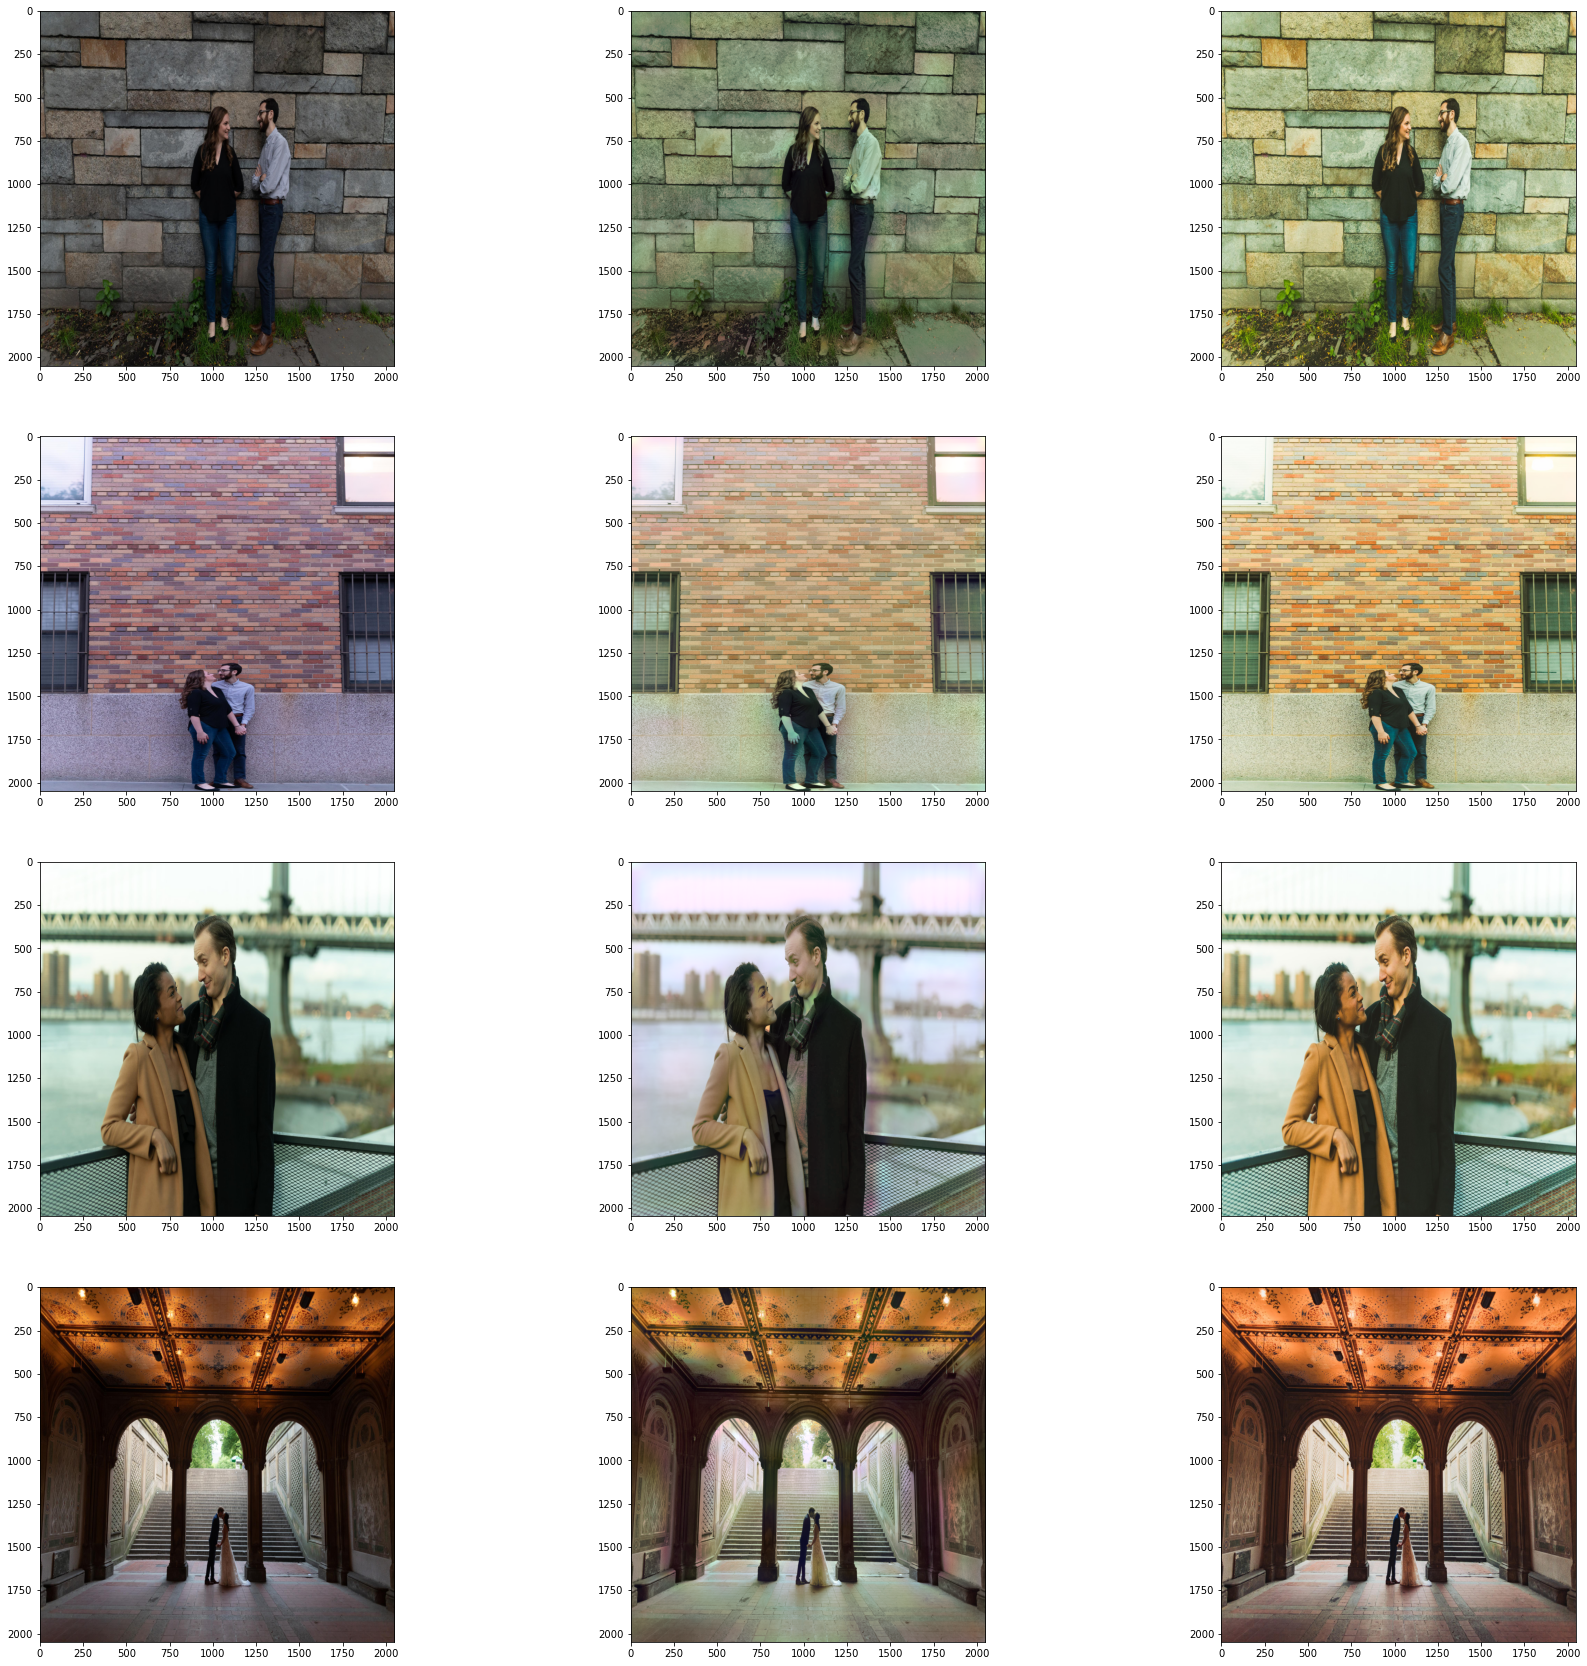

In [10]:
f, axs = plt.subplots(pred.shape[0],3,figsize=(30,30))
for ii in range(pred.shape[0]):
    
    plt.subplot(pred.shape[0],3,3*ii+1)
    plt.imshow(input_image_full[ii].permute(1, 2, 0))
    
    plt.subplot(pred.shape[0],3,3*ii+2)
    plt.imshow(pred[ii].detach().permute(1, 2, 0))
    
    plt.subplot(pred.shape[0],3,3*ii+3)
    plt.imshow(output_image_full[ii].detach().permute(1, 2, 0))
    
    

In [11]:
plt.imshow(pred_2.detach().permute(1, 2, 0))

NameError: name 'pred_2' is not defined

In [1]:
%load_ext tensorboard
%tensorboard --logdir=/home/adong/hdrnet-pytorch/fivek_logs/lightning_logs/version_1494304/

In [4]:
!pwd

/home/adong/hdrnet-pytorch/notebooks


In [5]:
MyModel.load_from_checkpoint(checkpoint_path="example.ckpt")

/home/adong/anaconda3/envs/hdrnet/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /home/adong/hdrnet-pytorch/fivek_logs/lightning_logs/version_1494304 exists and is not empty.
  warnings.warn(*args, **kwargs)


In [6]:
hdrnet = HDRPointwiseNN()

In [7]:
hdrnet.load_from_checkpoint(checkpoint_path='/home/adong/hdrnet-pytorch/fivek_logs/lightning_logs/version_1494304/checkpoints/epoch=3-step=19991.ckpt')

HDRPointwiseNN(
  (low_level): LowLevelFeatures(
    (conv1): ConvBlock(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (activation): ReLU()
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv2): ConvBlock(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (activation): ReLU()
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv4): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv5): ConvBlock(
      (conv)